<a href="https://colab.research.google.com/github/SUSOVAN-061/nyc-taxi-trip-ML/blob/main/SUSOVAN_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import time
import random 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

from shapely.geometry import Point,Polygon
import descartes

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset
df_taxi = pd.read_csv('/content/drive/MyDrive/CAPSTON PROJECT/ML capstone project 1 NYC /data/NYC Taxi Data.csv')

**Data Wrangling/Explore the Dataset**

In [4]:
df_taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
df_taxi.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [6]:
#Shape of the dataset
df_taxi.shape

(1458644, 11)

We have 1458644 observations, 11 features, and our target variable is trip_duration

In [7]:
#Data Type of features for dataset
df_taxi.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [8]:
# converting into datetime object
df_taxi['pickup_datetime'] = pd.to_datetime(df_taxi['pickup_datetime'], format = '%Y-%m-%d %H:%M:%S')
df_taxi['dropoff_datetime'] = pd.to_datetime(df_taxi['dropoff_datetime'], format = '%Y-%m-%d %H:%M:%S')
df_taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [9]:
#Data Type of features for dataset
df_taxi.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [10]:
#Info of the dataset
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [11]:
#Checking for null values in dataset
df_taxi.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

**Great!No missing values in the dataset.**

In [12]:
#Checking duplicate value in vendor_id
df_taxi[df_taxi.duplicated(['id'], keep=False)]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration


No duplicastes available in id which is trip id!

In [13]:
#Checking Date and Time range
print('Datetime range: {} to {}'.format(df_taxi.pickup_datetime.min(),df_taxi.dropoff_datetime.max()))

Datetime range: 2016-01-01 00:00:17 to 2016-07-01 23:02:03


Data is of 6 full months, from January 2016 to June 2016!

In [14]:
#Checking no. of vendors
df_taxi['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

In [15]:
#Checking Passenger count
print('Passenger Count: {} to {}'.format(df_taxi.passenger_count.min(),df_taxi.passenger_count.max()))

Passenger Count: 0 to 9


In [16]:
#The distribution of Pickup and Drop Off day of the week
print(df_taxi['pickup_datetime'].nunique())
print(df_taxi['dropoff_datetime'].nunique())

1380222
1380377


There are many different pickup and drop off dates in these 2 columns.

**Descriptive Statistics of the datase**t

In [17]:
df_taxi.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


Lets have a look at the distribution of various variables in the Data set.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



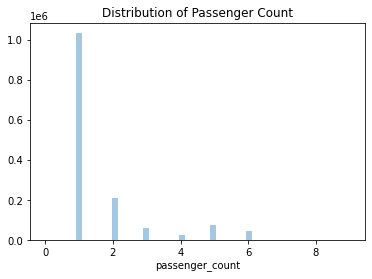

In [18]:
#Passenger Count
sns.distplot(df_taxi['passenger_count'],kde=False)
plt.title('Distribution of Passenger Count')
plt.show()

Here we can see that mostly 1 or 2 passengers avail the taxi. The instance of large group of people travelling together is rare.

**Lets create some features from datetime stamp.**

In [19]:
#Creating pickup and dropoff day
df_taxi['pickup_day']=df_taxi['pickup_datetime'].dt.day_name()
df_taxi['dropoff_day']=df_taxi['dropoff_datetime'].dt.day_name()

In [20]:
#Creating pickup and dropoff month
df_taxi['pickup_month']=df_taxi['pickup_datetime'].dt.month
df_taxi['dropoff_month']=df_taxi['dropoff_datetime'].dt.month

In [21]:
#Creating pickup and dropoff hour
df_taxi['pickup_hour']=df_taxi['pickup_datetime'].dt.hour
df_taxi['dropoff_hour']=df_taxi['dropoff_datetime'].dt.hour

In [22]:
df_taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hour,dropoff_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,3,3,17,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,1,11,12
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,4,4,19,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,3,3,13,13


In [23]:
df_taxi_cor = df_taxi.copy()
df_taxi_cor.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hour,dropoff_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,3,3,17,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,1,11,12
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,4,4,19,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,3,3,13,13


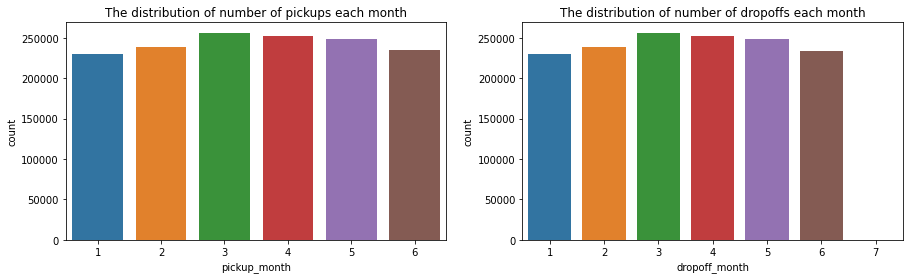

In [24]:
#Plotting monthly Pickup and Dropoff trip distribution
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,4))
sns.countplot(x='pickup_month',data=df_taxi,ax=ax[0])
ax[0].set_title('The distribution of number of pickups each month')
sns.countplot(x='dropoff_month',data=df_taxi,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs each month')
plt.show()

There is not so much of difference in Pickup and dropoff month.

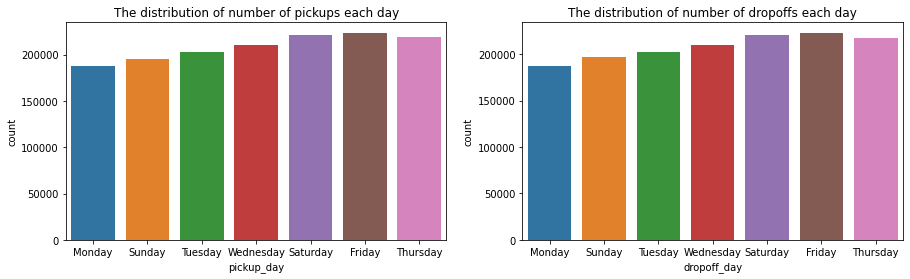

In [25]:
#Plotting daily Pickup and Dropoff trip distribution
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,4))
sns.countplot(x='pickup_day',data=df_taxi,ax=ax[0])
ax[0].set_title('The distribution of number of pickups each day')
sns.countplot(x='dropoff_day',data=df_taxi,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs each day')
plt.show()

We can see most trips were taken on Friday & least trips were taken on Monday.

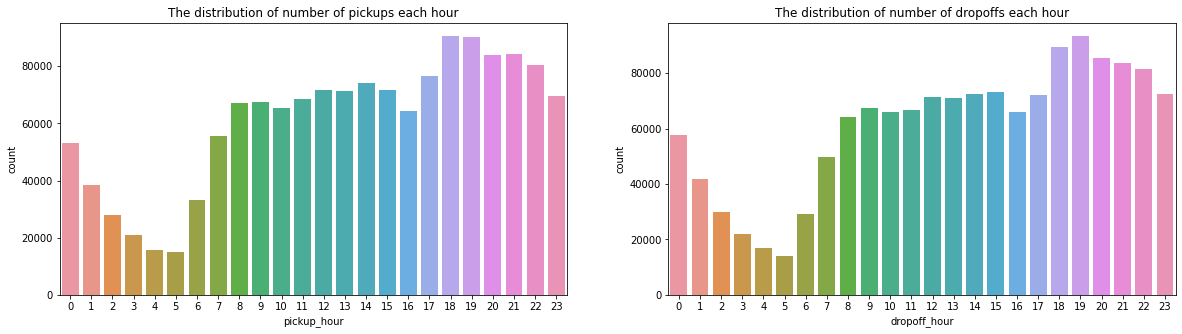

In [26]:
#Plotting hourly Pickup and Dropoff trip distribution
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
sns.countplot(x='pickup_hour',data=df_taxi,ax=ax[0])
ax[0].set_title('The distribution of number of pickups each hour')
sns.countplot(x='dropoff_hour',data=df_taxi,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs each hour')
plt.show()

Both the distribution looks quite similiar,majority of the trip has been booked from 6PM to 10PM.

In [27]:
#Creating a new column according to the traffic scenerio of New York
def rush_hour(hour):
    if hour.item()>=7 and hour.item()<=9:
        return 'rush_hour_morning(7-9)'
    elif hour.item()>9 and hour.item()<16:
        return 'normal_hour_afternoon(9-16)'
    elif hour.item()>=16 and hour.item()<=19:
        return 'rush_hour_evening(16-19)'
    elif hour.item()>19 and hour.item()<=23:
        return 'normal_hour_evining(19-23)'
    else:
        return 'latenight(23 onwards)'
df_taxi['traffic_scenerio_pickup']=df_taxi[['pickup_hour']].apply(rush_hour, axis=1)
df_taxi['traffic_scenerio_dropoff']=df_taxi[['dropoff_hour']].apply(rush_hour, axis=1)

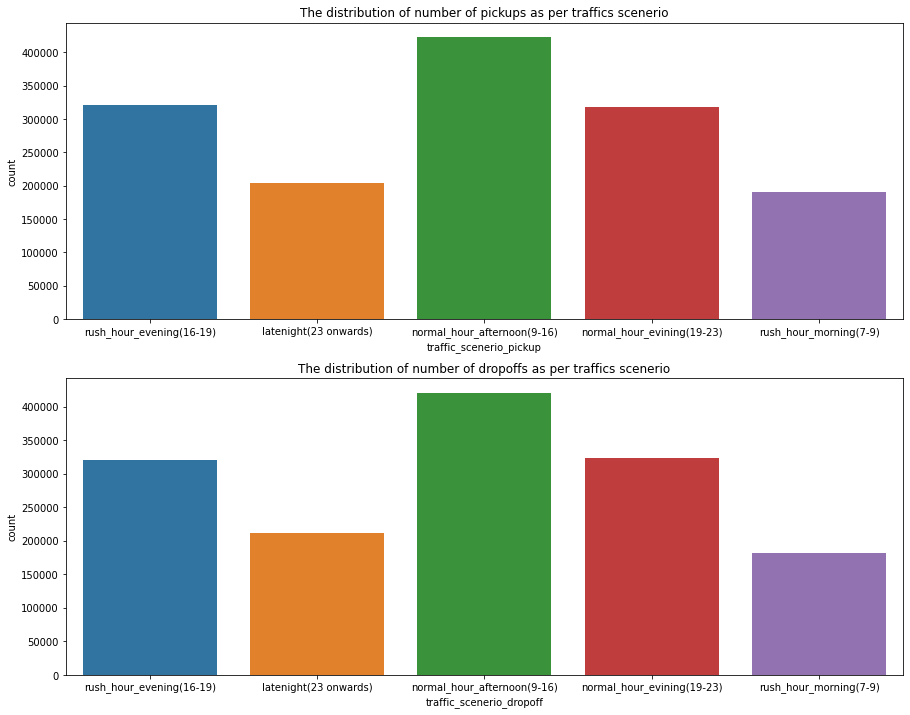

In [28]:
#Plotting pickup and dropoff trip distribution as per traffic scenerio
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(15,12))
sns.countplot(x='traffic_scenerio_pickup',data=df_taxi,ax=ax[0])
ax[0].set_title('The distribution of number of pickups as per traffics scenerio')
sns.countplot(x='traffic_scenerio_dropoff',data=df_taxi,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs as per traffics scenerio')
plt.show()


Distribution of the trip duration

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'The distribution of of the Pick Up  Duration distribution')

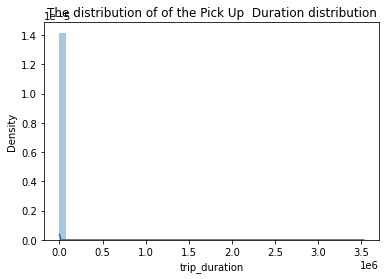

In [29]:
sns.distplot(df_taxi['trip_duration'],kde=True)
plt.title('The distribution of of the Pick Up  Duration distribution')

This histogram shows extreme right skewness, hence there are outliers.

 Lets see the boxplots of this variable.

We can see there are few outliers, which we have to treat.

In [30]:
#Dropping trip_duration <1 min
df_taxi= df_taxi[df_taxi.trip_duration>60] # >1 min

In [31]:
#Dropping trip_duration >2 Hrs
df_taxi= df_taxi[df_taxi.trip_duration<=7200] # >2 hrs

Removed trip duration of less than 1 min and greater than 2 hrs as its not looking sensible that one can hire taxi for less than a min or more that 2 hrs in a city like New York!

Distribution of vendor_id

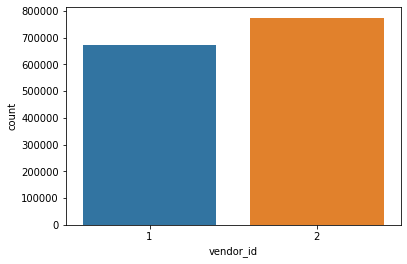

In [32]:
sns.countplot(x='vendor_id',data=df_taxi)

The distribution of vendor id is not much different.

Analysing geographical boundary of NYC.

In [33]:
#Checking Longitude and Lattitude bounds available in the data
print('Longitude Bounds: {} to {}'.format(max(df_taxi.pickup_longitude.min(),df_taxi.dropoff_longitude.min()),max(df_taxi.pickup_longitude.max(),df_taxi.dropoff_longitude.max())))
print('Lattitude Bounds: {} to {}'.format(max(df_taxi.pickup_latitude.min(),df_taxi.dropoff_latitude.min()),max(df_taxi.pickup_latitude.max(),df_taxi.dropoff_latitude.max())))

Longitude Bounds: -121.9333038330078 to -61.33552932739258
Lattitude Bounds: 34.359695434570305 to 51.88108444213867


In [34]:
#The borders of NY City, in coordinates comes out to be: city_long_border = (-74.03, -73.75) & city_lat_border = (40.63, 40.85)
#Comparing this to our 'df_taxi.describe()' output we see that there are some coordinate points (pick ups/drop offs) that fall outside these borders. So let's limit our area of investigation to within the NY City borders.
df_taxi = df_taxi[df_taxi['pickup_longitude'] <= -73.75]
df_taxi = df_taxi[df_taxi['pickup_longitude'] >= -74.03]
df_taxi = df_taxi[df_taxi['pickup_latitude'] <= 40.85]
df_taxi = df_taxi[df_taxi['pickup_latitude'] >= 40.63]
df_taxi = df_taxi[df_taxi['dropoff_longitude'] <= -73.75]
df_taxi = df_taxi[df_taxi['dropoff_longitude'] >= -74.03]
df_taxi = df_taxi[df_taxi['dropoff_latitude'] <= 40.85]
df_taxi = df_taxi[df_taxi['dropoff_latitude'] >= 40.63]

Based on Latitude and Longitude get the distance of the trip in km

This uses Haversine **Distance** 

In [35]:
#Getting distance(in km) from geographocal co-ordinates
from math import radians, sin, cos, sqrt, asin
def haversine(columns):
    lat1, lon1, lat2, lon2 = columns
    R = 6372.8 # Earth radius in kilometers
    
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    
    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))
    
    return R * c


    

In [36]:
cols = ['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']
distances = df_taxi[cols].apply(lambda x: haversine(x),axis = 1)
df_taxi['distance_km'] = distances.copy()
df_taxi['distance_km'] = round(df_taxi.distance_km,2)

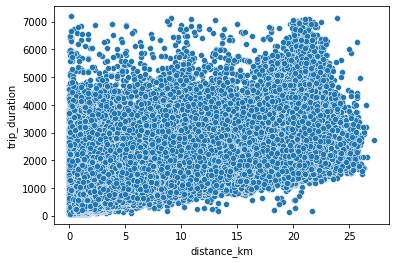

In [37]:
sns.scatterplot(x='distance_km',y='trip_duration',data=df_taxi)

In [38]:
#Removing distance Outliers
df_taxi = df_taxi[df_taxi['distance_km'] > 0]

Removed distance which have 0 value,seems to be cancelled trips.

In [39]:
#Getting Speed(Km/h) of the taxi 
df_taxi['speed_km/h']= 3600*(df_taxi.distance_km/df_taxi.trip_duration)  #3600 to convert it from km/s to km/h

In [40]:
#Checking Distance and Speed range
print('Distance Bounds: {} to {}'.format(df_taxi.distance_km.min(),df_taxi.distance_km.max()))
print('Speed Bounds: {} to {}'.format(df_taxi['speed_km/h'].min(),df_taxi['speed_km/h'].max()))

Distance Bounds: 0.01 to 27.2
Speed Bounds: 0.005539313740575473 to 584.0330578512397


In [41]:
#Removing speed Outliers
df_taxi = df_taxi[df_taxi['speed_km/h'] > 0]
df_taxi = df_taxi[df_taxi['speed_km/h'] < 100]

Removed average speed equals to zero and more than 100, as its seems to be outliers.

In [42]:
#Dropping passenger count=0
df_taxi= df_taxi[df_taxi.passenger_count>0]
df_taxi['passenger_count'].value_counts()

1    1009190
2     205377
5      76365
3      58594
6      47222
4      27730
Name: passenger_count, dtype: int64

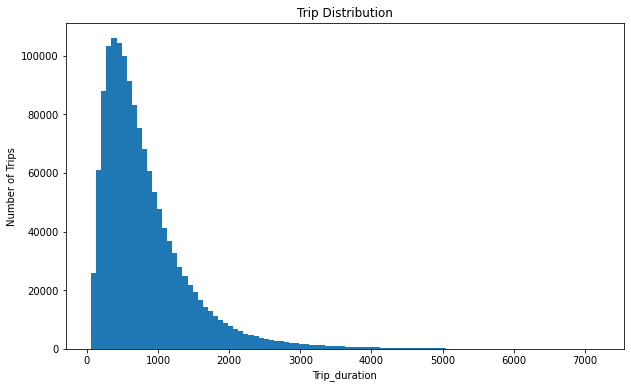

In [43]:
#Plotting Trip Distribution
plt.figure(figsize=(10,6))
plt.hist(df_taxi.trip_duration, bins=100)
plt.xlabel('Trip_duration')
plt.ylabel('Number of Trips')
plt.title('Trip Distribution')
plt.show()

Seems the distribution is skewed so we can apply certain transforms such as log transform!

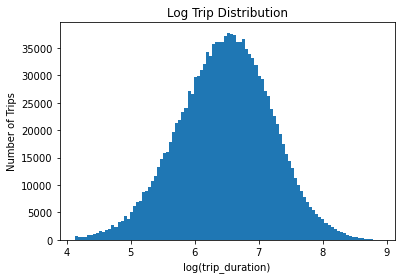

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



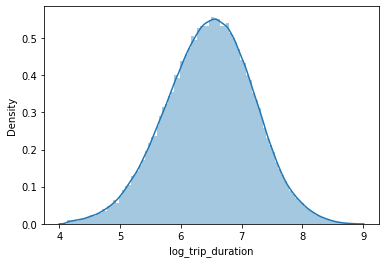

In [44]:
#Applying Feature Scaling in trip_duration caloumn to normalize the data
df_taxi['log_trip_duration']= np.log1p(df_taxi['trip_duration'])
plt.hist(df_taxi['log_trip_duration'].values, bins=100)
plt.title('Log Trip Distribution')
plt.xlabel('log(trip_duration)')
plt.ylabel('Number of Trips')
plt.show()
sns.distplot(df_taxi["log_trip_duration"], bins =100)

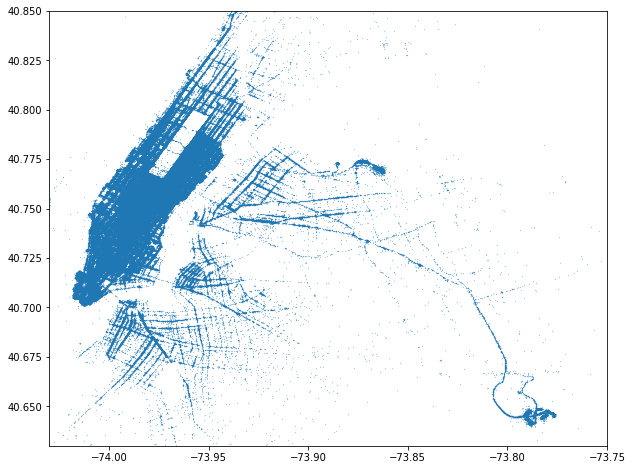

In [45]:
#Visualizing Passenger road map for picking up
fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(10,8))
plt.ylim(40.63, 40.85)
plt.xlim(-74.03,-73.75)
ax.scatter(df_taxi['pickup_longitude'],df_taxi['pickup_latitude'], s=0.02, alpha=1)

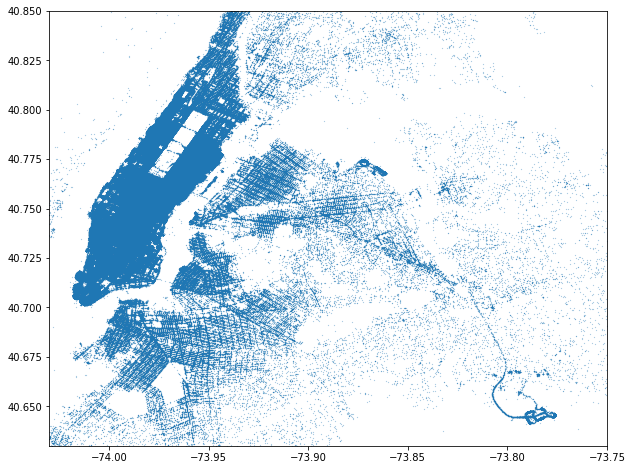

In [46]:
#Visualizing Passenger road map for dropoff
fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(10,8))
plt.ylim(40.63, 40.85)
plt.xlim(-74.03,-73.75)
ax.scatter(df_taxi['dropoff_longitude'],df_taxi['dropoff_latitude'], s=0.02, alpha=1)

In [47]:
df_taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hour,dropoff_hour,traffic_scenerio_pickup,traffic_scenerio_dropoff,distance_km,speed_km/h,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,3,3,17,17,rush_hour_evening(16-19),rush_hour_evening(16-19),1.50,11.868132,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,0,0,latenight(23 onwards),latenight(23 onwards),1.81,9.828054,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,1,11,12,normal_hour_afternoon(9-16),normal_hour_afternoon(9-16),6.39,10.830508,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,4,4,19,19,rush_hour_evening(16-19),rush_hour_evening(16-19),1.49,12.503497,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,3,3,13,13,normal_hour_afternoon(9-16),normal_hour_afternoon(9-16),1.19,9.848276,6.077642


In [48]:
#Applying one hot encoding to the catagorical variables
taxi_vendor=pd.get_dummies(df_taxi['vendor_id'], prefix='vendor_id',drop_first= True)
taxi_pax=pd.get_dummies(df_taxi['passenger_count'], prefix='passenger',drop_first= True)
taxi_store_and_fwd_flag=pd.get_dummies(df_taxi['store_and_fwd_flag'], prefix='store_and_fwd_flag',drop_first= True)
taxi_pickup_day=pd.get_dummies(df_taxi['pickup_day'], prefix='pickup_day',drop_first= True)
taxi_dropoff_day=pd.get_dummies(df_taxi['dropoff_day'], prefix='dropoff_day',drop_first= True)
taxi_pickup_month=pd.get_dummies(df_taxi['pickup_month'], prefix='pickup_month',drop_first= True)
taxi_dropoff_month=pd.get_dummies(df_taxi['dropoff_month'], prefix='dropoff_month',drop_first= True)
taxi_pickup_traffic_scenerio=pd.get_dummies(df_taxi['traffic_scenerio_pickup'], prefix='pickup_',drop_first= True)
taxi_dropoff_traffic_scenerio=pd.get_dummies(df_taxi['traffic_scenerio_dropoff'], prefix='dropoff_',drop_first= True)

In [49]:
#Adding encoded columns to final data
df_taxi=pd.concat([df_taxi,taxi_pax,taxi_vendor,taxi_store_and_fwd_flag,taxi_pickup_day,taxi_dropoff_day,taxi_pickup_month,taxi_dropoff_month,taxi_pickup_traffic_scenerio,taxi_dropoff_traffic_scenerio],axis=1)

In [50]:
df_taxi.head(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hour,dropoff_hour,traffic_scenerio_pickup,traffic_scenerio_dropoff,distance_km,speed_km/h,log_trip_duration,passenger_2,passenger_3,passenger_4,passenger_5,passenger_6,vendor_id_2,store_and_fwd_flag_Y,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,dropoff_day_Monday,dropoff_day_Saturday,dropoff_day_Sunday,dropoff_day_Thursday,dropoff_day_Tuesday,dropoff_day_Wednesday,pickup_month_2,pickup_month_3,pickup_month_4,pickup_month_5,pickup_month_6,dropoff_month_2,dropoff_month_3,dropoff_month_4,dropoff_month_5,dropoff_month_6,dropoff_month_7,pickup__normal_hour_afternoon(9-16),pickup__normal_hour_evining(19-23),pickup__rush_hour_evening(16-19),pickup__rush_hour_morning(7-9),dropoff__normal_hour_afternoon(9-16),dropoff__normal_hour_evining(19-23),dropoff__rush_hour_evening(16-19),dropoff__rush_hour_morning(7-9)
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,3,3,17,17,rush_hour_evening(16-19),rush_hour_evening(16-19),1.50,11.868132,6.122493,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,0,0,latenight(23 onwards),latenight(23 onwards),1.81,9.828054,6.498282,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,1,11,12,normal_hour_afternoon(9-16),normal_hour_afternoon(9-16),6.39,10.830508,7.661527,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [51]:
#Dropping unnecessary columns from dataset
df_taxi=df_taxi.drop(['id','vendor_id','passenger_count','pickup_datetime','dropoff_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','log_trip_duration','speed_km/h','store_and_fwd_flag','traffic_scenerio_pickup','traffic_scenerio_dropoff','pickup_month','dropoff_month','pickup_day','dropoff_day','pickup_hour','dropoff_hour','dropoff_month_7'],axis=1)

In [52]:
df_taxi.columns

Index(['trip_duration', 'distance_km', 'passenger_2', 'passenger_3',
       'passenger_4', 'passenger_5', 'passenger_6', 'vendor_id_2',
       'store_and_fwd_flag_Y', 'pickup_day_Monday', 'pickup_day_Saturday',
       'pickup_day_Sunday', 'pickup_day_Thursday', 'pickup_day_Tuesday',
       'pickup_day_Wednesday', 'dropoff_day_Monday', 'dropoff_day_Saturday',
       'dropoff_day_Sunday', 'dropoff_day_Thursday', 'dropoff_day_Tuesday',
       'dropoff_day_Wednesday', 'pickup_month_2', 'pickup_month_3',
       'pickup_month_4', 'pickup_month_5', 'pickup_month_6', 'dropoff_month_2',
       'dropoff_month_3', 'dropoff_month_4', 'dropoff_month_5',
       'dropoff_month_6', 'pickup__normal_hour_afternoon(9-16)',
       'pickup__normal_hour_evining(19-23)',
       'pickup__rush_hour_evening(16-19)', 'pickup__rush_hour_morning(7-9)',
       'dropoff__normal_hour_afternoon(9-16)',
       'dropoff__normal_hour_evining(19-23)',
       'dropoff__rush_hour_evening(16-19)', 'dropoff__rush_hour_morning

CORRELATIONS BETWEEN VARIABLES 

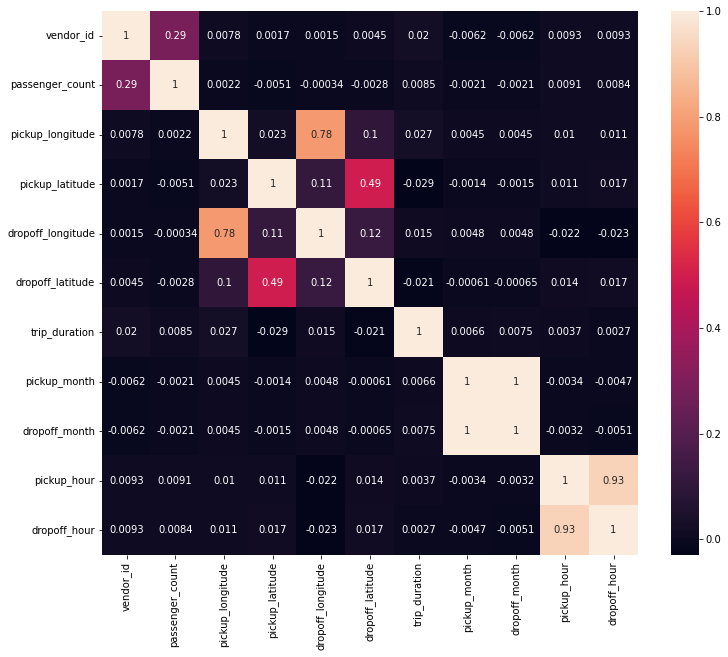

In [53]:
plt.figure(figsize=(12,10))
sns.heatmap(df_taxi_cor.corr(),annot=True)

In [54]:
# Calculating Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [55]:
calc_vif(df_taxi_cor[[i for i in df_taxi_cor.describe().columns]])

,variables,VIF
0,vendor_id,1.141976e+01
1,passenger_count,2.838793e+00
2,pickup_longitude,2.821635e+06
3,pickup_latitude,1.681551e+06
4,dropoff_longitude,2.648735e+06
5,dropoff_latitude,1.474532e+06
6,trip_duration,1.041203e+00
7,pickup_month,4.356904e+04
8,dropoff_month,4.357000e+04
9,pickup_hour,4.434616e+01


Here every variable correlation data is less than 5, so it is good to build the linear regression model

**Spliting Dataset into Train and Test**

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [57]:
#Assigning X and y variables
X = df_taxi.drop('trip_duration',1)
y = np.log10(df_taxi['trip_duration'])

In [58]:
#Splitting the dataset into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

ALGORITHM SELECTION

1. Building Linear Regression Mode

In [59]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
reg=lin_reg.fit(X_train,y_train)

In [60]:
reg.score(X_train,y_train)

0.47387768641181693

In [61]:
reg.coef_

array([ 0.05787159,  0.01319435,  0.01914327,  0.0237467 ,  0.00404736,
        0.00284177, -0.0025887 , -0.00263385, -0.17405288, -0.11241216,
       -0.27267343,  0.03970523, -0.06684883,  0.01063033,  0.12883485,
        0.0821789 ,  0.20612014, -0.02996271,  0.06183197, -0.00444462,
        0.03907947,  0.01756283,  0.05121955,  0.05332718,  0.07069582,
       -0.03491731, -0.0095969 , -0.02631957, -0.02225781, -0.03805386,
        0.14169908,  0.03713728,  0.08965705,  0.1869065 , -0.01313804,
        0.021822  ,  0.02291892, -0.1068006 ])

In [62]:
y_pred=reg.predict(X_test)

In [63]:
MSE=mean_squared_error(y_test,y_pred)
print('MSE=',MSE)
MAE=mean_absolute_error(y_test,y_pred)
print('MAE=',MAE)
RMSE=np.sqrt(MSE)
print('RMSE=',RMSE)

MSE= 0.05184393220964619
MAE= 0.1789601819085199
RMSE= 0.2276926266035995


In [64]:
# R2 score
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print('r2=',r2)

r2= 0.4736455206201733


In [65]:
#Train Score
lr_train=reg.score(X_train,y_train)
lr_train

0.47387768641181693

In [66]:
#Test Score
lr_test=reg.score(X_test,y_test)
lr_test

0.47364552062017334

In [67]:
list(y_test)

[3.3434085938038574,
 3.26030994579492,
 2.4913616938342726,
 2.733999286538387,
 3.025715383901341,
 2.6580113966571126,
 2.737987326333431,
 3.2317243833285163,
 2.4265112613645754,
 2.606381365110605,
 2.9138138523837167,
 1.9242792860618816,
 3.010299956639812,
 2.569373909615046,
 2.859138297294531,
 2.0253058652647704,
 3.0170333392987803,
 2.436162647040756,
 2.7218106152125467,
 2.9439888750737717,
 2.946452265013073,
 2.8603380065709936,
 2.6954816764901977,
 2.826722520168992,
 2.5538830266438746,
 2.904715545278681,
 2.5327543789924976,
 2.3944516808262164,
 1.806179973983887,
 2.8750612633917,
 3.0273496077747564,
 2.6473829701146196,
 2.890979596989689,
 3.0433622780211294,
 2.5634810853944106,
 2.7944880466591697,
 2.459392487759231,
 2.7528164311882715,
 2.7101173651118162,
 2.8992731873176036,
 3.1640552918934515,
 3.236537261488694,
 2.456366033129043,
 2.699837725867246,
 3.1341771075767664,
 3.0232524596337114,
 2.494154594018443,
 2.7427251313046983,
 3.113274692464

In [68]:
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 10000

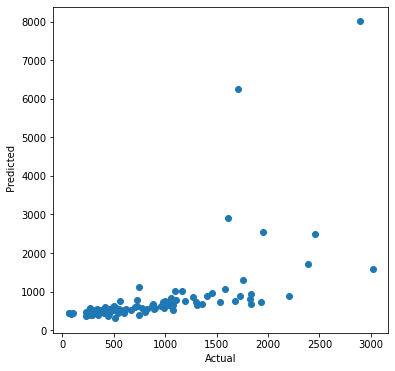

In [69]:
plt.figure(figsize=(6,6))
plt.scatter(10**(np.array(list(y_test)[:100])),(10**(np.array(y_pred[:100]))))
# plt.plot((y_pred))
plt.xlabel('Actual')
plt.ylabel(' Predicted')
plt.show()

RIDGE REGRESSION

In [70]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.01)
ridge_regression=ridge.fit(X_train,y_train)

In [71]:
ridge_regression.score(X_train,y_train)

0.47387768640910644

In [72]:
y_pred=reg.predict(X_test)

In [73]:
MSE=mean_squared_error(y_test,y_pred)
print('MSE=',MSE)
MAE=mean_absolute_error(y_test,y_pred)
print('MAE=',MAE)
RMSE=np.sqrt(MSE)
print('RMSE=',RMSE)

MSE= 0.05184393220964619
MAE= 0.1789601819085199
RMSE= 0.2276926266035995


In [74]:
y_test

666066     3.343409
1340391    3.260310
1111145    2.491362
1426976    2.733999
703626     3.025715
             ...   
291541     2.728354
1397447    2.959995
1135688    2.326336
374557     2.332438
200486     3.054613
Name: trip_duration, Length: 356120, dtype: float64

In [75]:
y_pred.shape

(356120,)

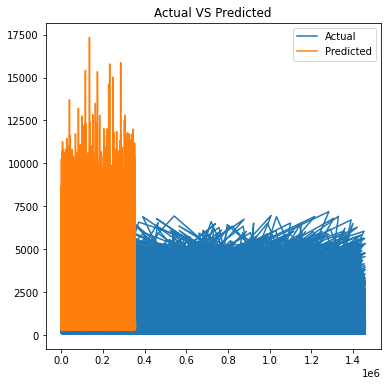

In [76]:
plt.figure(figsize=(6,6))
plt.plot(10**(y_test))
plt.plot(10**(y_pred))
plt.legend(['Actual','Predicted'])
plt.title('Actual VS Predicted')
plt.show()

Lasso Regression

In [77]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.005,max_iter=3000)

In [78]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [79]:
lasso.score(X_train,y_train)

0.4542012191851949

In [80]:
y_pred_lasso=lasso.predict(X_test)

In [81]:
MSE=mean_squared_error(y_test,y_pred_lasso)
print('MSE=',MSE)
MAE=mean_absolute_error(y_test,y_pred_lasso)
print('MAE=',MAE)
RMSE=np.sqrt(MSE)
print('RMSE=',RMSE)

MSE= 0.05382038099711182
MAE= 0.1824652887982772
RMSE= 0.23199220029369913


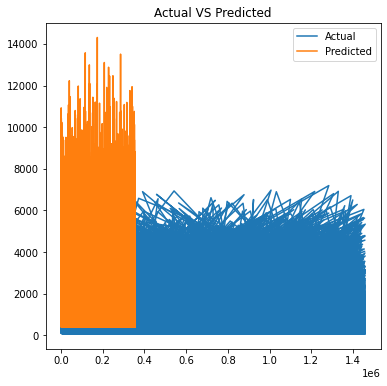

In [82]:
plt.figure(figsize=(6,6))
plt.plot(10**(y_test))
plt.plot(10**(y_pred_lasso))
plt.legend(['Actual','Predicted'])
plt.title('Actual VS Predicted')
plt.show()

2. **Building Decision Tree Regressor Model**

In [83]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)

In [84]:
#RMSE score 
dt_rmse = np.sqrt(metrics.mean_squared_error(dt_pred,y_test))
dt_rmse

0.21510875913137886

In [85]:
#R2 score
dt_r2score = metrics.r2_score(dt_pred,y_test)
dt_r2score

0.4614033022432802

In [86]:
#Train Score
dt_train=dt.score(X_train,y_train)
dt_train

0.8405675007115895

In [87]:
#Test Score
dt_test=dt.score(X_test,y_test)
dt_test

0.5302177764039361

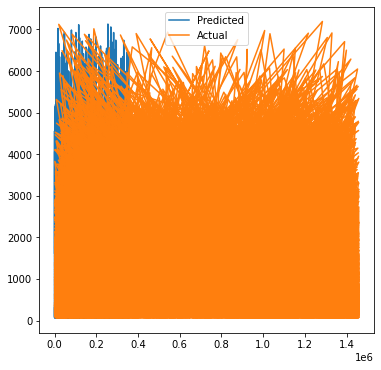

In [88]:
plt.figure(figsize=(6,6))
plt.plot(10**(dt_pred))
plt.plot((10**(y_test)))
plt.legend(['Predicted','Actual'])

3. **Building AdaBoost Regressor Model**

In [89]:
ab=AdaBoostRegressor()
ab.fit(X_train,y_train)
ab_pred=ab.predict(X_test)

In [90]:
#RMSE score 
ab_rmse = np.sqrt(metrics.mean_squared_error(ab_pred,y_test))
ab_rmse

0.19554645092251083

In [91]:
#R2 score
ab_r2score = metrics.r2_score(ab_pred,y_test)
ab_r2score

0.18342050329449044

In [92]:
#Train Score
ab_train=ab.score(X_train,y_train)
ab_train

0.6126974696304515

In [93]:
#Test Score
ab_test=ab.score(X_test,y_test)
ab_test

0.6117778902566624

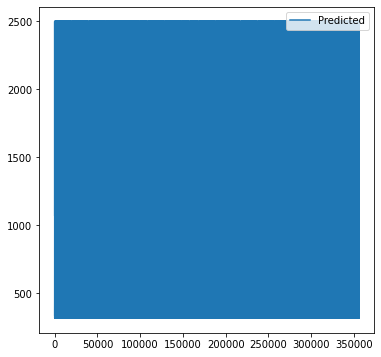

In [94]:
plt.figure(figsize=(6,6))
plt.plot(10**(ab_pred))
# plt.plot((10**(y_test)))
plt.legend(['Predicted','Actual'])

4. **Building XGB Regressor Model**

In [95]:
xgb= XGBRegressor()
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)

[14:04:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [96]:
#RMSE score 
xgb_rmse = np.sqrt(metrics.mean_squared_error(xgb_pred,y_test))
xgb_rmse

0.17518490789032667

In [97]:
#R2 score
xgb_r2score = metrics.r2_score(xgb_pred,y_test)
xgb_r2score

0.524643674267421

In [98]:
#Train Score
xgb_train=xgb.score(X_train,y_train)
xgb_train

0.6893295659769139

In [99]:
#Test Score
xgb_test=xgb.score(X_test,y_test)
xgb_test

0.6884169907106159

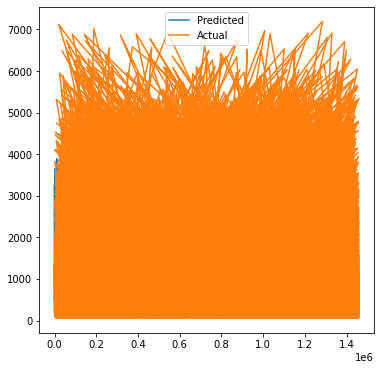

In [100]:
plt.figure(figsize=(6,6))
plt.plot(10**(xgb_pred))
plt.plot((10**(y_test)))
plt.legend(['Predicted','Actual'])

** Model Performance Assessment**

In [101]:
#Creating dictionary for all the metrics and models
metrics = {'Metrics': ['RMSE Score','R2 Score','Train Score','Test Score'],'Linear Regression':[RMSE,r2,lr_train,lr_test],
          'Decision Tree Regressor':[dt_rmse,dt_r2score,dt_train,dt_test],
        'AdaBoost Regressor':[ab_rmse,ab_r2score,ab_train,ab_test],
          'XGBoost Regressor':[xgb_rmse,xgb_r2score,xgb_train,xgb_test]}
           

In [102]:
#Converting dictionary to dataframe
metrics = pd.DataFrame(metrics)
metrics

,Metrics,Linear Regression,Decision Tree Regressor,AdaBoost Regressor,XGBoost Regressor
0,RMSE Score,0.231992,0.215109,0.195546,0.175185
1,R2 Score,0.473646,0.461403,0.183421,0.524644
2,Train Score,0.473878,0.840568,0.612697,0.689330
3,Test Score,0.473646,0.530218,0.611778,0.688417


Looking at the above Performance Matrix we can say thay XGBoost is the best model for this dataset.We may perform hyperparameter tuning on XGBoost model to improve the performance of the model

**PARAMETER TUNING**

In [103]:
xgb= XGBRegressor()
# xgb.fit(X_train,y_train)
# xgb_pred=xgb.predict(X_test)

In [104]:
parameters = {'eta': [0.1,0.5], 'max_depth': [2,4]}
xgb_regressor = GridSearchCV(xgb, parameters, scoring='neg_mean_squared_error', cv=3, verbose=3)

In [105]:
xgb_regressor.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] eta=0.1, max_depth=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[14:07:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ............... eta=0.1, max_depth=2, score=-0.032, total=  58.0s
[CV] eta=0.1, max_depth=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   58.0s remaining:    0.0s


[14:08:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ............... eta=0.1, max_depth=2, score=-0.032, total=  56.9s
[CV] eta=0.1, max_depth=2 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.9min remaining:    0.0s


[14:09:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ............... eta=0.1, max_depth=2, score=-0.032, total=  56.6s
[CV] eta=0.1, max_depth=4 ............................................
[14:10:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ............... eta=0.1, max_depth=4, score=-0.030, total= 1.6min
[CV] eta=0.1, max_depth=4 ............................................
[14:11:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ............... eta=0.1, max_depth=4, score=-0.030, total= 1.6min
[CV] eta=0.1, max_depth=4 ............................................
[14:13:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ............... eta=0.1, max_depth=4, score=-0.030, total= 1.

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 15.4min finished


[14:22:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'eta': [0.1, 0.5], 'max_depth': [2, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_sco

In [106]:
xgb_regressor.best_params_

{'eta': 0.1, 'max_depth': 4}

In [107]:
xgb_tuned= XGBRegressor(eta= 0.1 ,max_depth= 4)

In [108]:
xgb_tuned.fit(X_train,y_train)


[14:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [109]:
xgb_pred_tuned=xgb_tuned.predict(X_test)

In [110]:
#RMSE score 
xgb_rmse = np.sqrt(mean_squared_error(xgb_pred_tuned,y_test))
xgb_rmse

0.17403468943235068

In [111]:
#R2 score
xgb_r2score = r2_score(xgb_pred_tuned,y_test)
xgb_r2score

0.5440984975761274

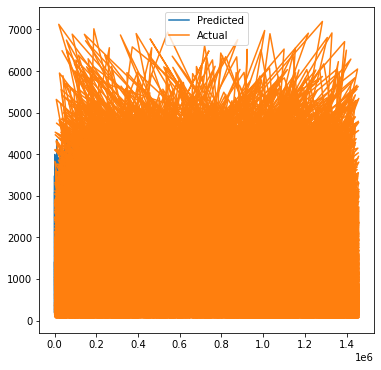

In [112]:
plt.figure(figsize=(6,6))
plt.plot(10**(xgb_pred_tuned))
plt.plot((10**(y_test)))
plt.legend(['Predicted','Actual'])

OUR EXERCISE ENDS HERE , NOT THE EXPLORATIONS .....